In [1]:
## Import libraries
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import seaborn as sns

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
## Get Most Recent Date and determine date to fetch last one year data
most_recent_record = session.query(func.max(Measurement.date)).scalar()
most_recent_dt = dt.datetime.strptime(most_recent_record, '%Y-%m-%d')
most_recent_dt = most_recent_dt.date()
most_recent_dt
## A year back from the most recent date
year = dt.timedelta(days=365)
year_ago =  most_recent_dt - year
year_ago

datetime.date(2016, 8, 23)

In [11]:
## Fetch last one year data (from the most recent date)
#Add filter to join Measurement and Station table # Add filter to fetch last one year data
my_query = session.query(Measurement, Station).filter(Station.station == Measurement.station).\
filter(Measurement.date>=year_ago)
data = pd.read_sql(my_query.statement, session.bind)
#check
data.head()

# Create dataframe
data = pd.DataFrame(data)
data.head()

C:\ProgramData\Anaconda3\lib\site-packages\sqlalchemy\sql\base.py:527: SAWarning: Column 'id' on table <sqlalchemy.sql.selectable.Select at 0x1aeb1e35898; Select object> being replaced by Column('id', INTEGER(), table=<Select object>, primary_key=True, nullable=False), which has the same key.  Consider use_labels for select() statements.
  (key, getattr(existing, 'table', None), value))
C:\ProgramData\Anaconda3\lib\site-packages\sqlalchemy\sql\base.py:527: SAWarning: Column 'station' on table <sqlalchemy.sql.selectable.Select at 0x1aeb1e35898; Select object> being replaced by Column('station', TEXT(), table=<Select object>), which has the same key.  Consider use_labels for select() statements.
  (key, getattr(existing, 'table', None), value))


,id,station,date,prcp,tobs,id,station,name,latitude,longitude,elevation
0,2364,USC00519397,2016-08-23,0.00,81.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2365,USC00519397,2016-08-24,0.08,79.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,2366,USC00519397,2016-08-25,0.08,80.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,2367,USC00519397,2016-08-26,0.00,79.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,2368,USC00519397,2016-08-27,0.00,77.0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

In [13]:
# Use dataframe created above with one year dataframe
data_chart = data[['date','prcp']]
# Set Index on date
data_chart.set_index('date', inplace=True)
#  Sort on date
data_chart.sort_values(by="date", ascending=True, inplace=True, kind='heapsort')
data_chart = data_chart.dropna()
# Data to plot chart
data_chart.head()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.02
2016-08-23,0.70
2016-08-23,0.05


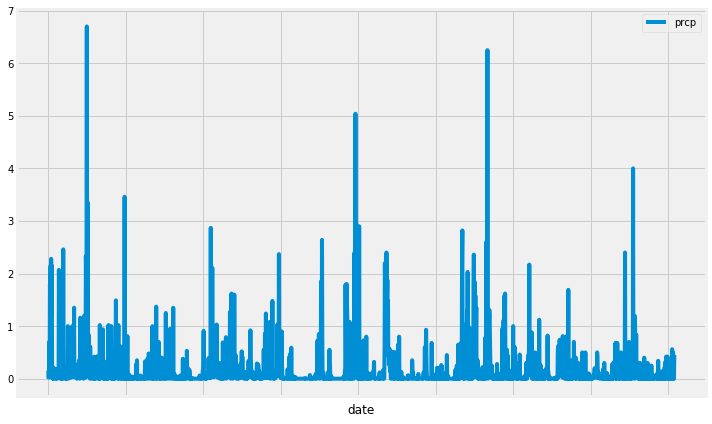

In [14]:
# Plot chart
data_chart.plot(figsize=(10, 6))
plt.tight_layout()
plt.show()


In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [16]:
# Get summary stats :
data_chart.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [17]:
# Design a query to show how many stations are available in this dataset?

In [18]:
#Get count of stations
session.query(Station.station).count()

9

In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

In [20]:
# Get station and record counts by station; order by desc
station_activity = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc())
for row in station_activity:
    print(row)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [21]:
# most active station
mas = session.query(Measurement.station,
                  func.count(Measurement.station))\
.group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).limit(1).scalar()

print(mas)

USC00519281


In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

In [23]:
# Fetch data for the mas ( Most active Station) identified at above qeury
q = session.query(Station.id,
                  Station.name,
                  func.min(Measurement.tobs),
                  func.max(Measurement.tobs),
                  func.avg(Measurement.tobs))\
.filter(Measurement.station == Station.station)\
.filter(Measurement.station == mas)
print(f"Minimum temperature:{q[0][2]}, Maximum temperture:{q[0][3]}, Average temperature:{q[0][4]}")

Minimum temperature:54.0, Maximum temperture:85.0, Average temperature:71.66378066378067


In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

In [25]:
# Highest number of temperature obseravation (mas = USC00519281)
# Apply filter on date and most active station 
h_data_chart = session.query(Measurement.tobs).filter(Measurement.date >= year_ago).filter(Measurement.station == mas).all()

# Create Dataframe for histogram
h_data_chart = pd.DataFrame (h_data_chart)
h_data_chart.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


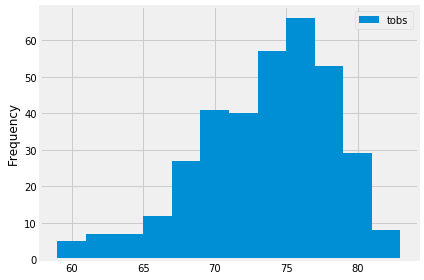

In [26]:
h_data_chart.plot(kind='hist',bins=12)
plt.tight_layout()
plt.show()

In [27]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [28]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

# Use the above derived two dates:
print(calc_temps(year_ago, most_recent_dt))

[(58.0, 74.59058295964125, 87.0)]


In [29]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

In [30]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
c_stat = calc_temps(year_ago, most_recent_dt)
print(c_stat)

x = np.array(c_stat)
TripAvgTemp = x[0,1]
TripMinTemp = x[0,0]
TripMaxTemp = x[0,2]
TripAvgTemp = pd.DataFrame([TripAvgTemp])
TripMinTemp = pd.DataFrame([TripMinTemp])
TripMaxTemp = pd.DataFrame([TripMaxTemp])
err_range = np.std([TripMinTemp,TripMaxTemp])
err_range



[(58.0, 74.59058295964125, 87.0)]


14.5

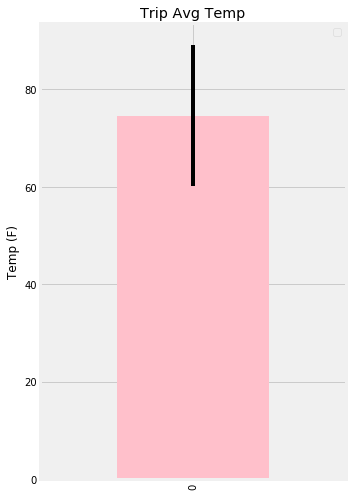

In [31]:
TripAvgTemp.plot.bar( yerr = err_range, figsize=(5, 7), color = 'pink')
plt.ylabel('Temp (F)')
plt.xlabel('')
plt.legend('')
plt.title('Trip Avg Temp')
plt.tight_layout()
plt.show()

## Optional Challenge Assignment

In [32]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

In [33]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [34]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [35]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [36]:
# Plot the daily normals as an area plot with `stacked=False`
